In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn
import numpy as np

from made import MADE

In [3]:
import matplotlib.pyplot as plt

In [4]:
from data.toydata import ToyDataset

In [5]:
from flows import create_iaf
from flows import create_maf
from flows import create_paf
from flows import create_realnvp
from flows import create_flows

In [6]:
from train import train_forward
from scores import log_likelihood
from scores import difference_loglik

In [7]:
from structure.ar import AR
from structure.iar import IAR
from structure.twoblock import TwoBlock

from transforms.affine import Affine
from transforms.piecewise import PiecewiseAffine

In [8]:
dim_input = 2
dim_hidden = [10,10,10]
num_trans = 8
perm_type = 'alternate'

In [9]:
dataset = ToyDataset()

/storage/software/PyTorch-bundle/1.7.0/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729062494/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [10]:
transformations = [Affine, Affine, PiecewiseAffine, PiecewiseAffine, Affine, Affine, PiecewiseAffine, PiecewiseAffine]
structures = IAR

In [33]:
#flow = create_iaf(dim_input, dim_hidden, num_trans, perm_type)
#flow = create_maf(dim_input, dim_hidden, num_trans, perm_type)
#flow = create_paf(dim_input, dim_hidden, num_trans, perm_type)
#flow = create_realnvp(dim_input, dim_hidden, num_trans, perm_type)
flow = create_flows(dim_input, dim_hidden, num_trans, perm_type, structure=structures, transformation=transformations)

In [34]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

flow.to(device)
None

In [35]:
#optimizer = torch.optim.AdamW(flow.parameters(), lr=1e-3)
optimizer = torch.optim.SGD(flow.parameters(), lr=1e-3)

In [36]:
base_distr = flow.get_base_distr()

In [37]:
loss = train_forward(flow, base_distr, dataset.get_training_data(), optimizer, epochs=200, batch_size=16,print_n=10)

     2.37408


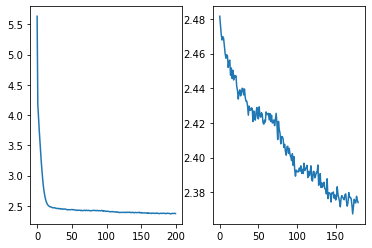

In [38]:
plt.subplot(1,2,1)
plt.plot(loss)

plt.subplot(1,2,2)
plt.plot(loss[20:])

In [39]:
train_data = dataset.get_training_data()

In [40]:
with torch.no_grad():
    sample, log_prob = flow.sample(800)
    sample_last = sample[-1].detach().cpu().numpy()

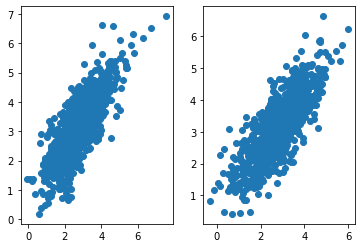

In [41]:
#xlims = (np.min(sample_last[:,0], train_data[:,0]), np.max(sample_last[:,0], train_data[:,0]))

plt.subplot(1,2,1)
plt.scatter(sample_last[:,0], sample_last[:,1])
#plt.xlim(-1,9)
#plt.ylim(-1,9)

plt.subplot(1,2,2)
plt.scatter(train_data[:,0].to('cpu'), train_data[:,1].to('cpu'))
#plt.xlim(-1,9)
#plt.ylim(-1,9)

In [20]:
log_prob_target = dataset.evaluate(sample[-1])
torch.mean(torch.abs(log_prob_target - log_prob))

tensor(0.2667)

In [21]:
with torch.no_grad():
    z_train, log_prob_train = flow.evaluate(train_data)

In [22]:
log_prob_train_target = dataset.evaluate(train_data)

In [23]:
torch.mean(torch.abs(log_prob_train_target-log_prob_train))

tensor(0.1339)

In [24]:
torch.mean(log_prob_train), torch.mean(log_prob_train_target)

(tensor(-2.3501), tensor(-2.3620))

In [25]:
test_data = dataset.get_test_data()

In [26]:
with torch.no_grad():
    z_train, log_prob_test = flow.evaluate(test_data)

In [27]:
log_prob_test_target = dataset.evaluate(test_data)

In [28]:
torch.mean(torch.abs(log_prob_test_target-log_prob_test))

tensor(0.1367)

In [29]:
torch.mean(log_prob_test), torch.mean(log_prob_test_target)

(tensor(-2.3331), tensor(-2.2952))

In [30]:
log_lik, mean = log_likelihood(train_data, flow)

In [31]:
log_lik_diff, mean_diff = difference_loglik(train_data, dataset, flow)

In [32]:
log_lik_diff, mean_diff

([array([1.93197727e-02, 6.81638718e-02, 1.37102604e-01, 6.51311874e-02,
         1.41811848e-01, 2.81937122e-02, 3.38554382e-05, 1.17423296e-01,
         2.16991663e-01, 1.63226724e-01, 5.63650131e-02, 2.69254684e-01,
         3.07576656e-01, 1.51898384e-01, 2.53986597e-01, 1.26336098e-01,
         1.20088577e-01, 9.36086178e-02, 1.08457327e-01, 7.41723776e-02,
         1.44184589e-01, 1.93501711e-01, 8.37447643e-02, 1.66826010e-01,
         6.39510155e-02, 1.33521795e-01, 6.89706802e-02, 7.40666389e-02,
         1.22871399e-01, 1.44305468e-01, 9.83502865e-02, 1.10455275e-01,
         5.86650372e-02, 1.51747704e-01, 7.03356266e-02, 1.16959572e-01,
         2.52813101e-01, 7.85374641e-02, 4.65154648e-03, 3.73702049e-02,
         5.49738884e-01, 1.02028847e-02, 1.11760139e-01, 2.98669100e-01,
         2.19763279e-01, 1.64870262e-01, 7.84955025e-02, 4.06521320e-01,
         6.60061836e-02, 7.70874023e-02, 5.58245182e-03, 7.40921497e-02,
         7.86788464e-02, 3.34315300e-02, 2.67458677